In [1]:
import sys
sys.path.append('../popalign/')
import popalign as PA
import importlib

In [2]:
PA.__file__

'../popalign/popalign.py'

In [3]:
# Load data (example)
LOAD = 'screen'

# Load samples from distinct matrix files
if LOAD == 'samples':
    mysamples = {
        'CTRL' : '../data/samples/PBMC.mtx',
        'GMCSF_1ng/ml' : '../data/samples/GMCSF.mtx',
        'IFNG_1ng/ml' : '../data/samples/IFNG.mtx',
        'IL2_10ng/ml' : '../data/samples/IL2.mtx',
        'CD40L_20ng/ml' : '../data/samples/CD40L.mtx',
    }
    mygenes = '../data/samples/genes.tsv'
    pop = PA.load_samples(samples=mysamples, 
                          genes=mygenes,
                          outputfolder='output_samples')
    
# Load samples from one matrix file with metadata (must include cell_barcode, sample_id columns)
elif LOAD == 'screen':
    mymatrix = '../data/screen/drug_screen/pbmcmult4cd3minus.mtx'
    mybarcodes = '../data/screen/drug_screen/barcodes.tsv'
    mygenes = '../data/screen/drug_screen/features.tsv'
    mymetadata = '../data/screen/drug_screen/meta.csv'
    pop = PA.load_screen(matrix=mymatrix, 
                         barcodes=mybarcodes, 
                         metafile=mymetadata, 
                         genes=mygenes,
                         outputfolder='output_screen')

In [4]:
# Perform column normalization
# Find best normalization factor
PA.normalize(pop, scaling_factor=None)

Performing column normalization
Finding best scaling factor


1506 genes selected


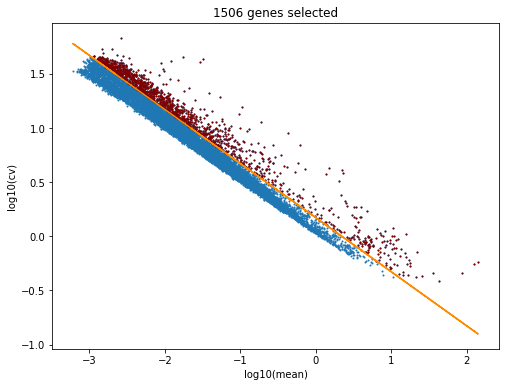

In [6]:
# Plot genes (log cv ~ log cv) and filtering line --use multiple times to find best offset (usually between .7 and 1.5)
PA.plot_gene_filter(pop, offset=1.22)

In [7]:
# Gene filter the data with the last offset value used in the previous step
PA.filter(pop, remove_ribsomal=True)

Removing ribosomal genes
Filtering genes ang logging data


In [8]:
# Remove red blood cells from the data
PA.removeRBC(pop, species='human')

In [9]:
# Generate multiple feature spaces and pick the best one based on reconstruction error
# Run GSEA on each feature
# Generate QC plots
PA.onmf(pop, ncells=5000, nfeats=[5,7], nreps=3, niter=500)

Computing W matrices
......... Iteration #0
......... Iteration #0
......... Iteration #0
......... Iteration #0
......... Iteration #0
......... Iteration #0
......... Iteration #100
......... Iteration #100
......... Iteration #100
......... Iteration #100
......... Iteration #100
......... Iteration #100
......... Iteration #200
......... Iteration #200
......... Iteration #200
......... Iteration #200
......... Iteration #200
......... Iteration #200
......... Iteration #300
......... Iteration #300
......... Iteration #300
......... Iteration #300
......... Iteration #300
......... Iteration #300
......... Iteration #400
......... Iteration #400
......... Iteration #400
......... Iteration #400
......... Iteration #400
......... Iteration #400
......... Iteration #499
Orthogonal NMF performed with 500 iterations

......... Iteration #499
Orthogonal NMF performed with 500 iterations

......... Iteration #499
Orthogonal NMF performed with 500 iterations

......... Iteration #499
...

In [10]:
# Build a Gaussian Mixture model for each sample
# Type the models subpopulations
PA.build_gmms(pop, 
              ks=(5,8), 
              niters=3, 
              training=.8, 
              nreplicates=3,
              reg_covar=True, 
              rendering='grouped', 
              types=None)

Building model for Meprednisone (1 of 41)
Building model for Dexrazoxane HCl (ICRF-187, ADR-529) (2 of 41)
Building model for Etodolac (3 of 41)
Building model for Phenylbutazone (4 of 41)
Building model for Pomalidomide (5 of 41)
Building model for Budesonide (6 of 41)
Building model for Loteprednol etabonate (7 of 41)
Building model for CTRL (8 of 41)
Building model for Betamethasone Valerate (9 of 41)
Building model for Febuxostat (10 of 41)
Building model for Sulfasalazine (11 of 41)
Building model for Flurbiprofen (12 of 41)
Building model for Mianserin HCl (13 of 41)
Building model for Naproxen Sodium (14 of 41)
Building model for Triamcinolone Acetonide (15 of 41)
Building model for Acetylcysteine (16 of 41)
Building model for Everolimus (RAD001) (17 of 41)
Building model for Isotretinoin (18 of 41)
Building model for Ibuprofen (19 of 41)
Building model for Doramapimod (BIRB 796) (20 of 41)
Building model for Allopurinol Sodium (21 of 41)
Building model for Tranilast (22 of 41)


In [11]:
# Align subpopulations of each sample against a reference model's subpopulations
PA.align(pop, ref='CTRL', method='conservative')

In [ ]:
# Rank each sample against a reference sample's model
PA.rank(pop, ref='CTRL', k=100, niter=200, mincells=50)

In [ ]:
# Build a unique GMM for the samples concatenated together
PA.build_unique_gmm(pop, ks=(5,20), niters=3, reg_covar=True, types=None)

In [ ]:
# Generate a query plot
PA.plot_query(pop)

In [144]:
importlib.reload(PA)
genelist = [
    'CD14',
    'CD33',
    'LYZ',
    'FCER1G',
    'LGALS3',
    'CSF1R',
    'ITGAX',
    'ITGAM',
    'CD86',
    'HLA-DRB1'
]
PA.plot_heatmap(pop, refcomp=0, genelist=genelist, savename=None, figsize=(15,15), cmap='Purples', samplelimits=True)

In [ ]:
# Interactive 3D visualization of the data in feature space
import plotly
plotly.offline.init_notebook_mode()
PA.plotfeatures(pop)